In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPool2D
from keras.optimizers import Adam
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
X_train = pd.read_pickle('Assignment3/trainX.pickle')
y_train = pd.read_pickle('Assignment3/trainY.pickle')

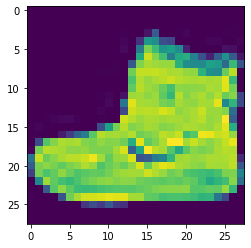

In [3]:
plt.imshow(X_train[0])
plt.show()

In [4]:
y_train[0]

9

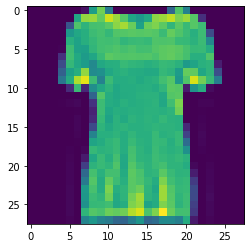

In [5]:
plt.imshow(X_train[10])
plt.show()

In [6]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [7]:
X_train[0].shape

(28, 28)

In [8]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [9]:
# Preprocess data, normalize, make one hot encoding
X_train = X_train.astype('float32')
X_train /= 255

y_train = keras.utils.to_categorical(y_train,10)

In [10]:
trainX = X_train[:48000]
valX = X_train[48000:54000]
testX = X_train[54000:]

trainY = y_train[:48000]
valY = y_train[48000:54000]
testY = y_train[54000:]

In [11]:
trainX = np.reshape(trainX, (48000,28,28,1))
trainY = np.reshape(trainY, (48000,10))
valX = np.reshape(valX, (6000,28,28,1))
valY = np.reshape(valY, (6000,10))
testX = np.reshape(testX, (6000,28,28,1))
testY = np.reshape(testY, (6000,10))
print(trainX.shape,valX.shape,testX.shape)
print(trainY.shape,valY.shape,testY.shape)

(48000, 28, 28, 1) (6000, 28, 28, 1) (6000, 28, 28, 1)
(48000, 10) (6000, 10) (6000, 10)


In [12]:
# initialize the model
model = Sequential()
# first set of CONV => RELU => POOL layers
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# second set of CONV => RELU => POOL layers
model.add(Conv2D(32, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# third set of CONV => RELU => POOL layers
model.add(Conv2D(16, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.25))
# softmax classifier
model.add(Dense(10))
model.add(Activation("softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          4624      
__________

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
cb = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, save_best_only=True,save_weights_only=False,
                     mode='auto', period=1)

model.fit(trainX,trainY,batch_size=128,epochs=30,verbose=1,validation_data=(valX,valY),callbacks=[cb])

score = model.evaluate(testX,testY,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Train on 48000 samples, validate on 6000 samples
Epoch 1/30
48000/48000 [==============================] - 38s 790us/step - loss: 0.7728 - acc: 0.7180 - val_loss: 0.5117 - val_acc: 0.8142

Epoch 00001: val_loss improved from inf to 0.51173, saving model to model.h5
Epoch 2/30
48000/48000 [==============================] - 37s 773us/step - loss: 0.4742 - acc: 0.8276 - val_loss: 0.3919 - val_acc: 0.8570

Epoch 00002: val_loss improved from 0.51173 to 0.39188, saving model to model.h5
Epoch 3/30
48000/48000 [==============================] - 37s 778us/step - loss: 0.3998 - acc: 0.8554 - val_loss: 0.3545 - val_acc: 0.8683

Epoch 00003: val_loss improved from 0.39188 to 0.35447, saving model to model.h5
Epoch 4/30
48000/48000 [==============================] - 37s 777us/step - loss: 0.3625 - acc: 0.8679 - val_loss: 0.3252 - val_acc: 0.8852

Epoch 00004: val_loss improved from 0.35447 to 0.32516, saving model to model.h5
Epoch 5/30
48000/48000 [==============================] - 37s 771us/ste

In [15]:
test_data = pd.read_pickle('Assignment3/testX.pickle')

In [16]:
print(test_data.shape)

(10000, 28, 28)


In [17]:
test_data = test_data.astype('float32')
test_data /= 255
test_data = np.reshape(test_data, (10000,28,28,1))

In [18]:
y_pred = model.predict_classes(test_data)

In [19]:
y_pred

array([9, 2, 1, ..., 8, 1, 7])

In [20]:
y_pred[0]

9

In [21]:
set(y_pred)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

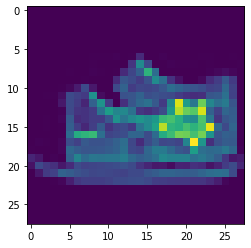

In [23]:
plt.imshow(test_data[-1].reshape(28,28))
plt.show()

In [24]:
y_pred[-1]

7

In [26]:
# Writing prediction results to pickle file
with open('Assignment3/predictions.pickle','wb') as f:
    pickle.dump(y_pred,f)